/var/folders/z2/rmvv1qt937g_5bp6hf_qfy7h0000gn/T/ipykernel_12936/1862542159.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data', delim_whitespace=True, header=None


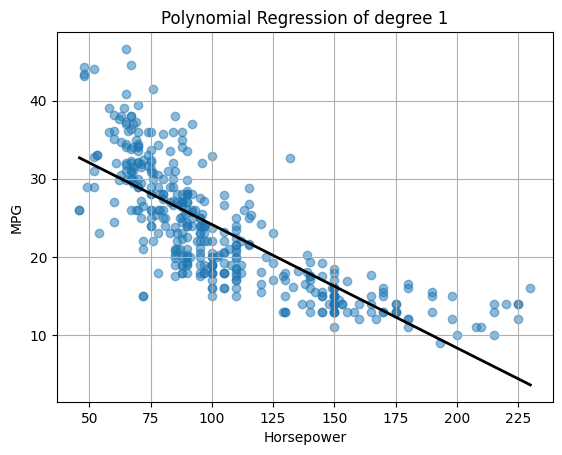

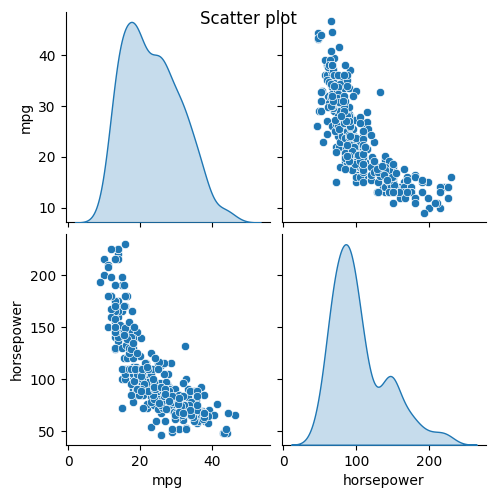

MAE  is: 4.043325288478147
RMSE is: 4.955413560049769
MAE Polynomial is: 4.043325288478146
RMSE Polynomial is: 4.955413560049768


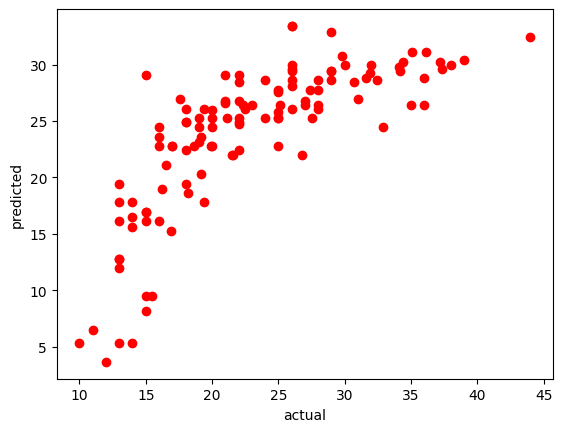

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import seaborn as sns
from sklearn.model_selection import train_test_split

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data', delim_whitespace=True, header=None
)

df.columns = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year", "origin", "car_name"]

df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df.dropna(inplace=True)  
df.drop_duplicates(inplace=True)

x = df['horsepower']
y = df['mpg']

degree = 1
modelPol = np.poly1d(np.polyfit(x, y, degree))

y_hat = modelPol(x)
print_data = np.linspace(x.min(), x.max(), 100)

plt.scatter(x, y, alpha=0.5)
plt.plot(print_data, modelPol(print_data), color="black", linewidth=2)
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title(f'Polynomial Regression of degree {degree}')
plt.grid()
plt.show()


feat = df[['mpg', 'horsepower']]

sns.pairplot(feat, diag_kind='kde')

plt.suptitle("Scatter plot")
plt.show()


Xtrain, Xtest, Ytrain, Ytest = train_test_split(df[['horsepower']], df['mpg'], random_state=42, shuffle=True, test_size=0.3)

modelLinear = linear_model.LinearRegression()
modelLinear.fit(Xtrain, Ytrain)
pred = modelLinear.predict(Xtest)

plt.scatter(Ytest, pred, c='red')
plt.xlabel('actual')
plt.ylabel('predicted')


from sklearn.metrics import mean_absolute_error, root_mean_squared_error

mae = mean_absolute_error(Ytest, pred)
rmse = root_mean_squared_error(Ytest, pred)

print(f"MAE  is: {mae}")
print(f"RMSE is: {rmse}")


poly_model = np.poly1d(np.polyfit(Xtrain['horsepower'], Ytrain, degree))

poly_pred = poly_model(Xtest['horsepower'])

maeP = mean_absolute_error(Ytest, poly_pred)
rmseP = root_mean_squared_error(Ytest, poly_pred)

print(f"MAE Polynomial is: {maeP}")
print(f"RMSE Polynomial is: {rmseP}")




In [53]:
from sklearn.metrics import mean_absolute_error

errors = []

for degree in range(1, 10): 
    poly_model = np.poly1d(np.polyfit(Xtrain['horsepower'], Ytrain, degree))
    poly_pred = poly_model(Xtest['horsepower'])

    mae = mean_absolute_error(Ytest, poly_pred)
    errors.append((degree, mae))
    

best_degree = min(errors, key=lambda x: x[1])
print(f'Best Degree: {best_degree[0]} with MAE: {best_degree[1]:.2f}')


Best Degree: 7 with MAE: 3.33
